In [14]:
# Dependencies and Setup

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [25]:
#pass through data files
empl_data_path =  "data/employment_data_cleaned.csv"

# Read the employment data 
empl_data = pd.read_csv(empl_data_path)

#display the data table for preview
empl_data.head

<bound method NDFrame.head of        Year                   Hobbyist  ConvertedComp  \
0      2017                  Yes, both    43750.00000   
1      2017  Yes, I program as a hobby    51282.05128   
2      2017                         No    25000.00000   
3      2017  Yes, I program as a hobby   100000.00000   
4      2017                  Yes, both    27000.00000   
...     ...                        ...            ...   
33596  2020                        Yes   225000.00000   
33597  2020                        Yes      369.00000   
33598  2020                         No    38484.00000   
33599  2020                        Yes   140000.00000   
33600  2020                        Yes   129718.00000   

                                    Country            EdLevel  \
0                            United Kingdom  Bachelor's degree   
1                                   Denmark       some college   
2                                    Israel       some college   
3                    

In [36]:
df = pd.read_csv('data/employment_data_cleaned.csv')
df = df[df['Data scientist or machine learning specialist']==1]
valc = df['Country'].value_counts()
country_list = valc[valc >= 50].index.tolist()
df = df[df['Country'].isin(country_list)]

rename_income = df.rename(columns = {'ConvertedComp':'Income'})

# Exclude 5% of smallest and 5% of highest salaries
P = np.percentile(df['Income'], [5, 95])
df = df[(df['Income'] > P[0]) & (df['Income'] < P[1])]

# Convert compensations into kUSD/year
df['Income'] = round(df['Income']*1e-3,1)

# Exclude columns with non-unique values
df = df[df.columns[df.nunique() > 1]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8762 entries, 0 to 33599
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    8762 non-null   int64  
 1   Hobbyist                8762 non-null   object 
 2   Income                  8762 non-null   float64
 3   Country                 8762 non-null   object 
 4   EdLevel                 8711 non-null   object 
 5   Employment              8753 non-null   object 
 6   JobSat                  8742 non-null   float64
 7   OrgSize                 8393 non-null   object 
 8   UndergradMajor          8273 non-null   object 
 9   YearsCodePro            8748 non-null   float64
 10  Database administrator  8762 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 821.4+ KB


In [27]:
df = df.dropna()

In [28]:
df.isnull().any()

Year                        False
Hobbyist                    False
ConvertedComp               False
Country                     False
EdLevel                     False
Employment                  False
JobSat                      False
OrgSize                     False
UndergradMajor              False
YearsCodePro                False
Database administrator      False
Data or business analyst    False
Engineer, data              False
dtype: bool

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4614 entries, 13361 to 33599
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      4614 non-null   int64  
 1   Hobbyist                  4614 non-null   object 
 2   ConvertedComp             4614 non-null   float64
 3   Country                   4614 non-null   object 
 4   EdLevel                   4614 non-null   object 
 5   Employment                4614 non-null   object 
 6   JobSat                    4614 non-null   float64
 7   OrgSize                   4614 non-null   object 
 8   UndergradMajor            4614 non-null   object 
 9   YearsCodePro              4614 non-null   float64
 10  Database administrator    4614 non-null   int64  
 11  Data or business analyst  4614 non-null   float64
 12  Engineer, data            4614 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 504.7+ KB

In [46]:
country_df = df['Country'].value_counts()
country_df

mean_income_country = df.groupby(['Country'])['Income'].mean().sort_values(ascending = False).head(10)
mean_income_country



Country
United States     100.284028
Israel             95.771560
Switzerland        92.080682
Denmark            81.675000
Norway             78.269474
Australia          76.236449
Canada             69.377635
United Kingdom     67.573314
Ireland            67.270690
New Zealand        63.096491
Name: Income, dtype: float64

In [44]:

med_income_country = df.groupby(['Country'])['Income'].median().sort_values(ascending = False).head(10)
med_income_country

Country
Israel            105.30
United States     100.00
Switzerland        91.20
Denmark            79.35
Norway             77.80
Australia          72.50
Canada             64.90
Ireland            63.00
Germany            61.10
United Kingdom     60.00
Name: Income, dtype: float64

In [ ]:
'israel, united states, Denmark, Norway, Australia, Canada, Ireland, Germany, United Kingdom'

In [67]:
print(country_list)

['United States', 'Germany', 'India', 'United Kingdom', 'Canada', 'France', 'Brazil', 'Netherlands', 'Spain', 'Australia', 'Russian Federation', 'Switzerland', 'Poland', 'Italy', 'Sweden', 'Israel', 'Turkey', 'Belgium', 'Denmark', 'Pakistan', 'Norway', 'Austria', 'Mexico', 'Czech Republic', 'Finland', 'South Africa', 'Iran', 'Greece', 'Japan', 'Portugal', 'Ireland', 'Ukraine', 'Argentina', 'Romania', 'New Zealand', 'Bulgaria']


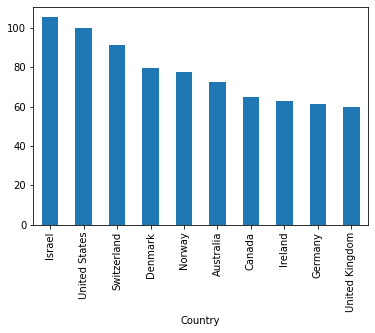

In [76]:
# data_df[“Job Title”].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)

df.groupby(['Country'])['Income'].median().sort_values(ascending = False).head(10).plot.bar()

plt.show()



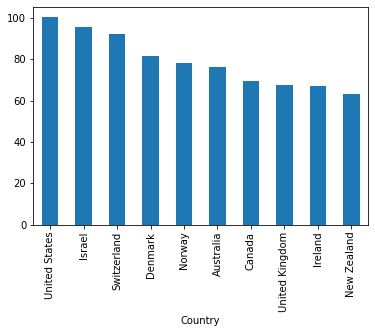

In [77]:

df.groupby(['Country'])['Income'].mean().sort_values(ascending = False).head(10).plot.bar()

plt.show()

In [71]:
# # Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# # ['Israel', 'United States', 'Denmark', 'Norway', 'Australia', 'Canada', 'Ireland', 'Germany', 'United Kingdom']


# country_name = for country in countries [ mean_income_country ]
# fig1, ax1 = plt.subplots(figsize=(15, 10))
# plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
# plt.plot(mean_income_country, med_income_country, linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
# plt.xlabel('country_df',fontsize =14)
# plt.ylabel('Tumor Volume (mm3)',fontsize =14)
# plt.xticks('')


# plt.savefig("mean.jpg")
plt.show()

SyntaxError: invalid syntax (3551926331.py, line 5)

In [31]:
# Preprocess Hobbyist column
hb_dict = {c:c.split(',')[0] for c in df['Hobbyist'].unique()}
df['Hobbyist'] = df['Hobbyist'].replace(hb_dict)
df['Hobbyist'].value_counts()

Yes    3818
No      796
Name: Hobbyist, dtype: int64

In [32]:
# Preprocess EdLevel column and alter education level into acronym 
edlevel_dict = {"Bachelor's degree": "BSc", "Master's degree": "MSc", "Doctoral degree": "PhD"}
ed_vc = df['EdLevel'].value_counts()
for idx, val in zip(ed_vc.index, ed_vc.values):
    if idx not in edlevel_dict:
        edlevel_dict[idx] = "Other"
df['EdLevel'] = df['EdLevel'].replace(edlevel_dict)
df['EdLevel'].value_counts()

MSc      2036
BSc      1532
PhD       700
Other     346
Name: EdLevel, dtype: int64

In [33]:
# Preprocess Employment column
df['Employment'] = df['Employment'].replace({'Employed full-time': 'Fulltime', 
                                             'Independent contractor, freelancer, or self-employed': 'Other',
                                            'Employed part-time': 'Other'})
df['Employment'].value_counts()

Fulltime    4064
Other        550
Name: Employment, dtype: int64

In [24]:
#call out to dataframe, hobbyist yes datafram .loc 
9th activity in mathplot lib


SyntaxError: invalid syntax (1402931162.py, line 2)